In [1]:
import numpy as np
import ssid
import quakeio
from ssid import modal, spec
from utilities import Config, extract_channels, list_files, print_modes, mode_statistics

### Data inputs

In [2]:
directory = "../CESMD/CE58658/"
pattern  = "????????*.[zZ][iI][pP]"
# pattern = "sanlorenzo_28june2021.zip"
# pattern = "*[sb][ae][nr][lk]*"

In [3]:
data_conf = Config()

# # PAINTER RIO DELL TRANSVERSE (CASE 1)
# data_conf.inputs  = [17,3,20]
# data_conf.outputs = [9,7,4]
# # PAINTER RIO DELL LONGITUDINAL (CASE 2)
# data_conf.inputs  = [15,1,18]
# data_conf.outputs = [11]

# # HWY8/MELOLAND TRANSVERSE (CASE 1)
# data_conf.inputs  = [2],
# data_conf.outputs = [5,7,9]
# # HWY8/MELOLAND TRANSVERSE (CASE 2)
# data_conf.inputs  = [11,2,26],
# data_conf.outputs = [5,7,9]
# # HWY8/MELOLAND LONGITUDINAL (CASE 3)
# data_conf.inputs  = [12,4,25],
# data_conf.outputs = [27,8]

# # CROWLEY TRANSVERSE (CASE 1)
# data_conf.inputs = [4]
# data_conf.outputs = [6,7,9]
# # CROWLEY TRANSVERSE (CASE 2)
# data_conf.inputs = [6,4,9]
# data_conf.outputs = [7]
# # CROWLEY TRANSVERSE (CASE 3)
# data_conf.inputs = [4]
# data_conf.outputs = [7]
# # CROWLEY LONGITUDINAL (CASE 4)
# data_conf.inputs = [5]
# data_conf.outputs = [8]

# # RIDGECREST TRANSVERSE (CASE 1)
# data_conf.inputs  = [4]
# data_conf.outputs = [6,7,9]

# # CAPISTRANO TRANSVERSE (CASE 1)
# data_conf.inputs  = [4]
# data_conf.outputs = [10,7]

# HAYWARD TRANSVERSE (CASE 1)
data_conf.inputs  = [25,2,7,18]
data_conf.outputs = [23,13,15,20]
# # HAYWARD LONGITUDINAL
# data_conf.inputs  = [6,3,17]
# data_conf.outputs = [14,12,19]
# # HAYWARD LONGITUDINAL
# data_conf.inputs  = [3,6,17]
# data_conf.outputs = [12,14,19]

# # BERNARDINO TRANSVERSE BENT 3 (CASE 1)
# data_conf.inputs  = [6]
# data_conf.outputs = [7,8]
# # BERNARDINO TRANSVERSE BENT 8 (CASE 2)
# data_conf.inputs  = [24]
# data_conf.outputs = [19,20]
# # BERNARDINO LONGITUDINAL BENT 3 (CASE 3)
# data_conf.inputs  = [4]
# data_conf.outputs = [10]
# # BERNARDINO LONGITUDINAL BENT 8 (CASE 4)
# data_conf.inputs  = [22]
# data_conf.outputs = [17,18]

# # VINCENT THOMAS (CE14406) TRANSVERSE (CASE 1)
# data_conf.inputs  = [1,9,24]
# data_conf.outputs = [2,5,7]
# # VINCENT THOMAS TRANSVERSE DENSE (CASE 2)
# data_conf.inputs  = [1,9,24]
# data_conf.outputs = [2,4,5,6,7]
# # VINCENT THOMAS VERTICAL SOUTH DECK EDGE (CASE 3)
# data_conf.inputs  = [14,19,26]
# data_conf.outputs = [16,18,22]

### Method Inputs

### General Parameters
parameter | value
----------|-------
`p ` | number of output channels
`q ` | number of input channels
`nt` | number of timesteps
`dt` | timestep
`d`  | decimation (downsampling) factor

### Specific to Observer Kalman Identification (OKID)
parameter | value
----------|-------
`m`  | number of Markov parameters to compute (at most = nt)

### Specific to Eigensystem Realization Algorithm (ERA)
parameter | value
----------|-------
`no` | number of observability parameters
`nc` | number of controllability parameters
`r ` | reduced model order

### Specific to Data Correlations (DC)
parameter | value
----------|-------
`a`  | (alpha) number of additional block rows in Hankel matrix of correlation matrices
`b`  | (beta) number of additional block columns in Hankel matrix of correlation matrices
`l`  | initial lag
`g`  | lag (gap) between correlations

### Specific to System Realization with Information Matrix (SRIM)
parameter | value
----------|-------
`no` | number of steps used for identification (prediction horizon)

In [4]:
# Set Parameters
conf = Config()
conf.m  = 500
conf.no = 190
conf.nc = 190
conf.r  = 12
conf.a  = 0  
conf.b  = 0  
conf.l  = 10 
conf.g  = 3
conf.period_band = (0.2,1.6)
conf.damping = 0.06
conf.pseudo = True

../CESMD/CE58658/58658_002_20210623_17.15.07.P.zip
peak acceleration (cm/s/s): 908.091


/mnt/c/Users/16507/Documents/GitHub/SystemIdentification/src/ssid/realize.py:191: RuntimeWarning: invalid value encountered in matmul
  Ryy = Yno@Yno.T/ns
/mnt/c/Users/16507/Documents/GitHub/SystemIdentification/src/ssid/realize.py:192: RuntimeWarning: invalid value encountered in matmul
  Ruu = Uno@Uno.T/ns
100%|█████████▉| 14810/14811 [01:02<00:00, 238.26it/s]


Spectral quantities:
       T(s)        ζ        EMACO        MPC     EMACO*MPC
      0.09014    -0.005441  1.0        0.6664     0.6664   
      0.08438    0.004613   1.191e-34  0.8373     9.972e-35
      0.0815     -0.004801  1.0        0.7854     0.7854   
      0.04404    0.0003415  1.683e-13  0.9972     1.678e-13
      0.04344    0.0008396  1.8e-21    0.9956     1.792e-21
      0.02722    0.0004299  3.41e-21   0.9999     3.41e-21 
Mean Period(s): 0.06178478185533141
Standard Dev(s): 0.02432196060849607
../CESMD/CE58658/58658_003_20211002_12.22.00.P.zip
peak acceleration (cm/s/s): 872.494


100%|█████████▉| 14810/14811 [01:05<00:00, 227.84it/s]


Spectral quantities:
       T(s)        ζ        EMACO        MPC     EMACO*MPC
      0.07108    0.0001672  1.0        0.993      0.993    
      0.04272    0.006556   8.55e-49   0.9955     8.512e-49
      0.04216    0.002511   1.782e-09  0.9961     1.775e-09
      0.03662    0.001699   4.577e-09  0.9968     4.562e-09
      0.02725    0.007153   5.897e-96  0.998      5.885e-96
      0.02718    0.001811   1.486e-11  0.9989     1.484e-11
Mean Period(s): 0.041169101843231214
Standard Dev(s): 0.014766476691263106
../CESMD/CE58658/58658_004_20210723_08.59.25.P.zip
peak acceleration (cm/s/s): -847.931


100%|█████████▉| 10510/10511 [00:38<00:00, 275.03it/s]


Spectral quantities:
       T(s)        ζ        EMACO        MPC     EMACO*MPC
      0.09467    -0.002348  1.0        0.6735     0.6735   
      0.08979    0.000329   1.0        0.6004     0.6004   
      0.08587    0.002197   0.0        0.9052     0.0      
      0.03303    0.000757   0.99       0.994      0.984    
      0.02813    -0.0003128  1.0        0.9987     0.9987   
      0.02782    0.001136   8.835e-05  0.9988     8.825e-05
Mean Period(s): 0.05988432101006808
Standard Dev(s): 0.030377917486409015
../CESMD/CE58658/58658_005_20210803_12.52.01.P.zip
peak acceleration (cm/s/s): 1369.537


100%|█████████▉| 13110/13111 [00:54<00:00, 238.70it/s]


Spectral quantities:
       T(s)        ζ        EMACO        MPC     EMACO*MPC
      0.08694    -0.004484  1.0        0.9956     0.9956   
      0.08277    0.003163   4.895e-19  0.8099     3.965e-19
      0.08053    -0.001554  0.997      0.9862     0.9833   
      0.07293    0.01072    0.0        0.9101     0.0      
      0.0426     0.0007301  0.0        0.9981     0.0      
      0.02798    0.0004521  1.278e-13  0.999      1.277e-13
Mean Period(s): 0.06562401876471466
Standard Dev(s): 0.022251705139442038
../CESMD/CE58658/58658_005_20211007_11.51.59.P.zip
peak acceleration (cm/s/s): -69.642


100%|█████████▉| 12810/12811 [00:55<00:00, 230.06it/s]


Spectral quantities:
       T(s)        ζ        EMACO        MPC     EMACO*MPC
      0.0941     0.00482    1.0        0.9178     0.9178   
      0.08758    0.004051   1.0        0.936      0.936    
      0.08298    0.005366   0.999      0.8909     0.89     
      0.07062    0.03209    3.515e-68  0.9507     3.342e-68
      0.05155    0.001508   1.0        0.9985     0.9985   
      0.02774    -4.225e-05  1.0        0.9999     0.9999   
Mean Period(s): 0.06909396398267051
Standard Dev(s): 0.02302262486822076
../CESMD/CE58658/58658_007_20210426_10.09.54.P.zip
peak acceleration (cm/s/s): 56.486


100%|█████████▉| 12810/12811 [00:55<00:00, 229.08it/s]


Spectral quantities:
       T(s)        ζ        EMACO        MPC     EMACO*MPC
      0.09691    -0.001631  1.0        0.9801     0.9801   
      0.09227    -0.0002356  1.0        0.5327     0.5327   
      0.08446    0.008651   0.0        0.757      0.0      
      0.04148    0.001823   0.9999     0.9975     0.9974   
      0.03839    -0.0002333  1.0        0.9878     0.9878   
      0.0303     0.006816   1.11e-28   0.9996     1.109e-28
Mean Period(s): 0.06396880465746212
Standard Dev(s): 0.027688477166674285
../CESMD/CE58658/58658_014_20220215_12.01.04.P.zip
peak acceleration (cm/s/s): 35.168


100%|█████████▉| 12010/12011 [00:49<00:00, 244.99it/s]


Spectral quantities:
       T(s)        ζ        EMACO        MPC     EMACO*MPC
      0.1113     -0.006285  1.0        0.9872     0.9872   
      0.1038     0.002054   0.9544     0.9509     0.9076   
      0.06958    0.004365   1.142e-06  0.9452     1.08e-06 
      0.04033    0.002278   8.273e-08  0.9932     8.217e-08
      0.02935    3.844e-07  1.0        0.9948     0.9948   
      0.0267     0.002874   1.988e-17  0.9962     1.98e-17 
Mean Period(s): 0.06351252505419709
Standard Dev(s): 0.03416635777643831
../CESMD/CE58658/berkeley_04jan2018_72948801_ce58658p.zip
peak acceleration (cm/s/s): 39.371


100%|█████████▉| 12410/12411 [00:51<00:00, 242.05it/s]


Spectral quantities:
       T(s)        ζ        EMACO        MPC     EMACO*MPC
      0.6974     0.06941    0.0        0.9615     0.0      
      0.362      0.02489    0.9449     0.976      0.9222   
      0.2539     0.02968    3.667e-09  0.8067     2.958e-09
      0.2279     -0.00202   1.0        0.9574     0.9574   
      0.2        0.03056    3.443e-14  0.9229     3.178e-14
      0.1313     0.006066   1.0        0.7364     0.7364   
Mean Period(s): 0.31206815039328634
Standard Dev(s): 0.18558694638975454
../CESMD/CE58658/nc73654060_ce58658p.zip
peak acceleration (cm/s/s): 33.381


100%|█████████▉| 12810/12811 [00:56<00:00, 227.43it/s]


Spectral quantities:
       T(s)        ζ        EMACO        MPC     EMACO*MPC
      0.8455     -0.006955  1.0        0.9152     0.9152   
      0.401      0.03114    0.2354     0.9752     0.2296   
      0.2793     0.04765    0.0        0.965      0.0      
      0.2417     0.000302   1.0        0.9509     0.9509   
      0.1959     0.007868   1.0        0.9366     0.9366   
      0.1425     0.01597    3.868e-10  0.9907     3.832e-10
Mean Period(s): 0.3509910471770543
Standard Dev(s): 0.23509985893940374
../CESMD/CE58658/nc73689506_ce58658p.zip
peak acceleration (cm/s/s): 19.968


100%|█████████▉| 12010/12011 [00:42<00:00, 281.42it/s]


Spectral quantities:
       T(s)        ζ        EMACO        MPC     EMACO*MPC
      0.3643     0.05562    4.395e-08  0.5802     2.55e-08 
      0.2478     0.01779    1.0        0.9903     0.9903   
      0.2201     0.01048    1.0        0.9869     0.9869   
      0.1612     0.0463     4.504e-31  0.7882     3.551e-31
      0.1297     0.02334    1.461e-14  0.8679     1.268e-14
      0.06878    0.001494   1.0        0.9987     0.9987   
Mean Period(s): 0.1986328874418677
Standard Dev(s): 0.0942754322438003
../CESMD/CE58658/nc73691736_ce58658p.zip
peak acceleration (cm/s/s): -15.355


100%|█████████▉| 12010/12011 [00:43<00:00, 276.79it/s]


Spectral quantities:
       T(s)        ζ        EMACO        MPC     EMACO*MPC
      0.219      0.0081     1.0        0.9106     0.9106   
      0.1815     0.01805    0.2634     0.979      0.2579   
      0.05455    0.004836   0.8888     0.9574     0.851    
      0.04242    0.0007558  1.0        0.9869     0.9869   
      0.03232    0.000158   1.0        0.9703     0.9703   
      0.02683    0.0006816  1.0        0.9998     0.9998   
Mean Period(s): 0.09275889707250085
Standard Dev(s): 0.077235177874608
../CESMD/CE58658/nc73865505_ce58658p.zip
peak acceleration (cm/s/s): 2.943
No channels found
../CESMD/CE58658/sanlorenzo_28june2021.zip
peak acceleration (cm/s/s): -1575.976


100%|█████████▉| 6610/6611 [00:14<00:00, 468.80it/s]


Spectral quantities:
       T(s)        ζ        EMACO        MPC     EMACO*MPC
      0.6022     0.04626    1.0        0.9849     0.9849   
      0.2665     0.05269    0.0        0.9655     0.0      
      0.2476     0.07074    6.188e-33  0.9335     5.777e-33
      0.0718     0.00293    1.0        0.9601     0.9601   
      0.05237    0.007174   0.0        0.741      0.0      
      0.02786    0.0005562  1.0        0.9991     0.9991   
Mean Period(s): 0.21139535655649952
Standard Dev(s): 0.19813034856133074


NameError: name 'fig' is not defined

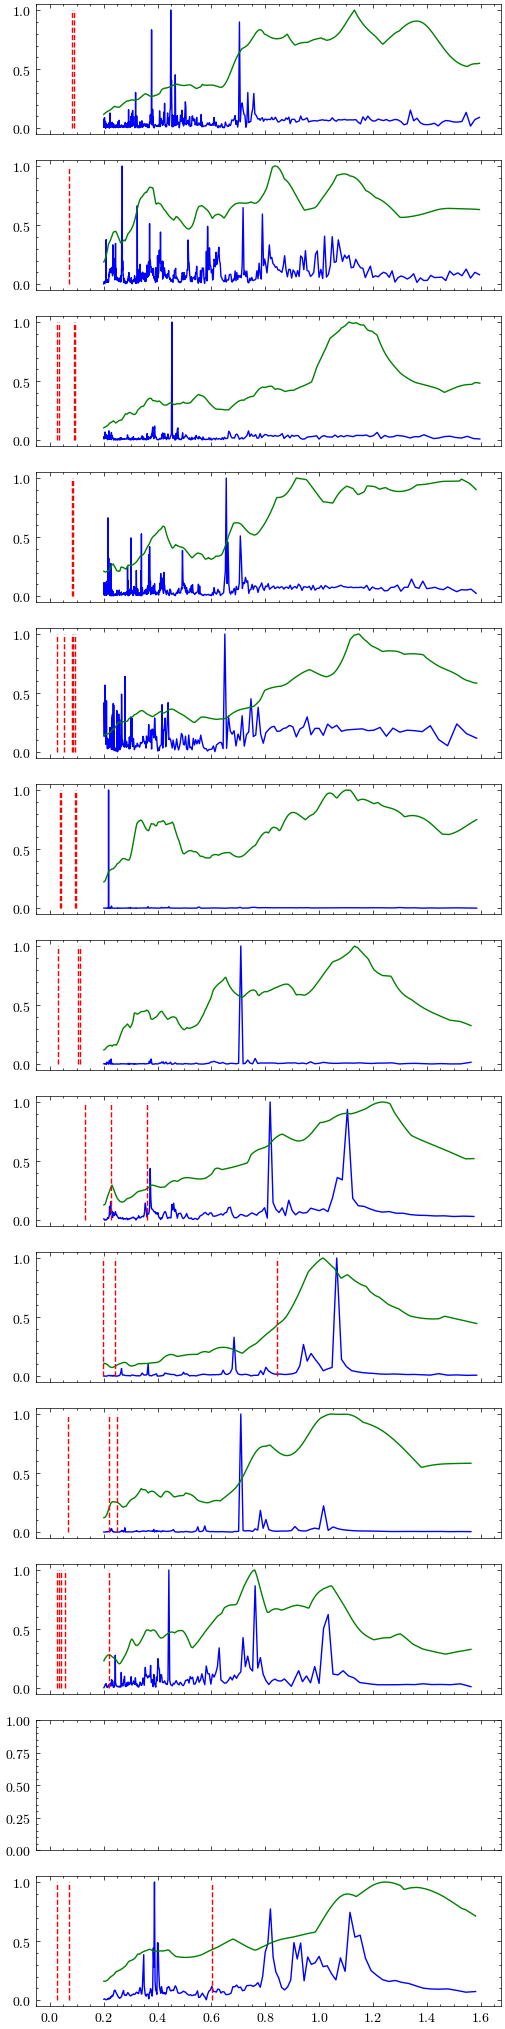

In [5]:
files = list(list_files(directory, pattern))
event_names = ["Berkeley", "San Lorenzo"]
event_names = [str(file) for file in files]
event_modes = []
from matplotlib import pyplot as plt
file_axes = {}

fix, axs = plt.subplots(len(files), figsize=(6,2*len(files)), sharex=True)
axi = iter(axs)

for i, file in enumerate(files):
    ax = next(axi)
    # fig, ax = plt.subplots(figsize=(10,5))
    print(file)
    try:
        event = quakeio.read(file, exclusions=["*filter*", "*date*"])
        print("peak acceleration (cm/s/s):", event["peak_accel"])
        inputs, dt = extract_channels(event, data_conf["inputs"])
        outpts, dt = extract_channels(event, data_conf["outputs"])
        conf.decimation = 1 # decimation factor
        realization = ssid.system(method="srim", inputs=inputs, outputs=outpts, **conf)
    except Exception as e:
        # raise e
        print(e)
        continue
    ss_modes = modal.system_modes(realization,dt,conf["decimation"],nt=inputs.shape[1])
    event_modes.append(list(ss_modes.values()))
    print_modes(ss_modes)
    conf.decimation = 1
    periods, amplitudes = spec.fourier_transfer(inputs=inputs[0], outputs=outpts[0], step=dt, **conf)
    amplitudes = amplitudes/max(amplitudes)
    ax.plot(periods, amplitudes, label="fourier "+event_names[i], color="blue") #, alpha = (1/(len(files)+2))*(i+1))
    periods, amplitudes = spec.response_transfer(inputs=inputs[0], outputs=outpts[0], step=dt, periods=periods, threads=8, **conf)
    amplitudes = amplitudes/max(amplitudes)
    ax.plot(periods, amplitudes, label="response spectrum "+event_names[i], color="green") #, alpha = (1/(len(files)+2))*(i+1))
    ax.vlines([1/value["freq"] for value in ss_modes.values() if value["energy_condensed_emaco"]>0.5 and value["mpc"]>0.5], 0, 1, color='r', linestyles='dashed', label=["State Space (OKID-ERA)" if i==0 else None][0])
fig.legend(bbox_to_anchor=(1.04,1))
event_frequencies = mode_statistics(event_modes, "freq")
# ax.set_title("Hayward Bridge Longitudinal Mode (In: Ch3, Out: Ch12)");
ax.set_title("Hayward Bridge Transverse Mode (In: Ch25, Out: Ch23)");